# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
NUM_POINTS = 1500    # DEBUG 1500
BASE_URL = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{BASE_URL}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_reponse = requests.get(city_url)
        city_weather = city_reponse.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print(f"City {city} not found; status: {city_reponse.status_code}. Skipping...")
        pass
              
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | vadso
Processing Record 4 of Set 1 | sao felix do xingu
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | chonchi
Processing Record 8 of Set 1 | labrador city
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | mugia
Processing Record 14 of Set 1 | dzhangala
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | newman
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | ancud
Processing Record 23 o

Processing Record 34 of Set 4 | holualoa
Processing Record 35 of Set 4 | maintirano
Processing Record 36 of Set 4 | sardarshahr
Processing Record 37 of Set 4 | roswell
Processing Record 38 of Set 4 | jalai nur
Processing Record 39 of Set 4 | charlottetown
Processing Record 40 of Set 4 | el espinal
Processing Record 41 of Set 4 | olonkinbyen
Processing Record 42 of Set 4 | hadibu
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | saint-francois
Processing Record 45 of Set 4 | sinop
Processing Record 46 of Set 4 | anadyr
Processing Record 47 of Set 4 | inderbor
Processing Record 48 of Set 4 | lar
Processing Record 49 of Set 4 | mirny
Processing Record 0 of Set 5 | ahau
City ahau not found; status: 404. Skipping...
Processing Record 1 of Set 5 | upata
Processing Record 2 of Set 5 | sao lourenco do sul
Processing Record 3 of Set 5 | mitu
Processing Record 4 of Set 5 | tazovsky
Processing Record 5 of Set 5 | vorgashor
Processing Record 6 of Set 5 | guerrero negro
Proces

Processing Record 14 of Set 8 | gaspe
Processing Record 15 of Set 8 | chanika
Processing Record 16 of Set 8 | sao gabriel da cachoeira
Processing Record 17 of Set 8 | howrah
Processing Record 18 of Set 8 | lorengau
Processing Record 19 of Set 8 | klishkivtsi
Processing Record 20 of Set 8 | pacific grove
Processing Record 21 of Set 8 | alo
Processing Record 22 of Set 8 | dalnerechensk
Processing Record 23 of Set 8 | al azraq ash shamali
City al azraq ash shamali not found; status: 404. Skipping...
Processing Record 24 of Set 8 | carutapera
Processing Record 25 of Set 8 | huanren
Processing Record 26 of Set 8 | kiama
Processing Record 27 of Set 8 | taro
Processing Record 28 of Set 8 | puerto ayora
Processing Record 29 of Set 8 | bardai
Processing Record 30 of Set 8 | mukalla
Processing Record 31 of Set 8 | qianzhou
Processing Record 32 of Set 8 | wasagu
Processing Record 33 of Set 8 | sparti
Processing Record 34 of Set 8 | igarka
Processing Record 35 of Set 8 | bijie
Processing Record 36

Processing Record 1 of Set 12 | sal rei
Processing Record 2 of Set 12 | ciudad sabinas hidalgo
Processing Record 3 of Set 12 | mammoth lakes
Processing Record 4 of Set 12 | itaocara
Processing Record 5 of Set 12 | vila velha
Processing Record 6 of Set 12 | kimbe
Processing Record 7 of Set 12 | tual
Processing Record 8 of Set 12 | dakhla
Processing Record 9 of Set 12 | ejutla de crespo
Processing Record 10 of Set 12 | wellington
Processing Record 11 of Set 12 | arraial do cabo
Processing Record 12 of Set 12 | balkanabat
Processing Record 13 of Set 12 | buchanan
Processing Record 14 of Set 12 | bikenibeu village
Processing Record 15 of Set 12 | as sulayyil
Processing Record 16 of Set 12 | stolbovaya
Processing Record 17 of Set 12 | upper sandusky
Processing Record 18 of Set 12 | el calafate
Processing Record 19 of Set 12 | aioun
Processing Record 20 of Set 12 | nguigmi
Processing Record 21 of Set 12 | yur'yevets
Processing Record 22 of Set 12 | bamboo flat
Processing Record 23 of Set 12 

In [5]:
city_weather

{'coord': {'lon': -79.8626, 'lat': 32.7941},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 75.31,
  'feels_like': 75.69,
  'temp_min': 72.99,
  'temp_max': 78.1,
  'pressure': 1006,
  'humidity': 67},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 360, 'gust': 14.97},
 'clouds': {'all': 20},
 'dt': 1700332229,
 'sys': {'type': 2,
  'id': 2035120,
  'country': 'US',
  'sunrise': 1700308338,
  'sunset': 1700345829},
 'timezone': -18000,
 'id': 4588165,
 'name': 'Mt. Pleasant',
 'cod': 200}

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,73.42,85,100,25.01,PN,1700332061
1,port elizabeth,-33.9180,25.5701,65.32,88,20,2.30,ZA,1700332062
2,vadso,70.0744,29.7487,19.56,73,20,11.50,NO,1700332062
3,sao felix do xingu,-6.6447,-51.9950,92.48,47,84,1.79,BR,1700332063
4,waitangi,-43.9535,-176.5597,49.82,93,100,5.01,NZ,1700332064


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,73.42,85,100,25.01,PN,1700332061
1,port elizabeth,-33.9180,25.5701,65.32,88,20,2.30,ZA,1700332062
2,vadso,70.0744,29.7487,19.56,73,20,11.50,NO,1700332062
3,sao felix do xingu,-6.6447,-51.9950,92.48,47,84,1.79,BR,1700332063
4,waitangi,-43.9535,-176.5597,49.82,93,100,5.01,NZ,1700332064


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

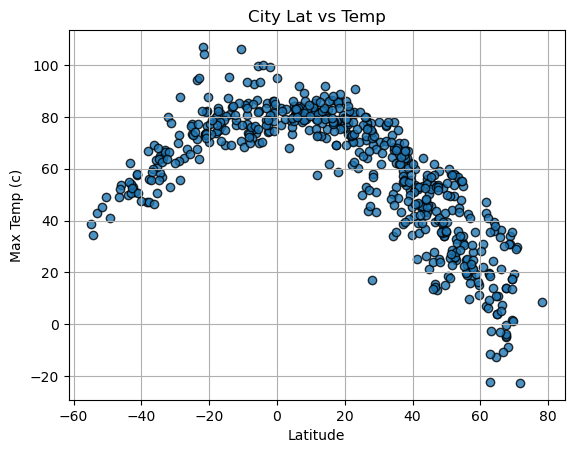

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
plt.title("City Lat vs Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (c)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

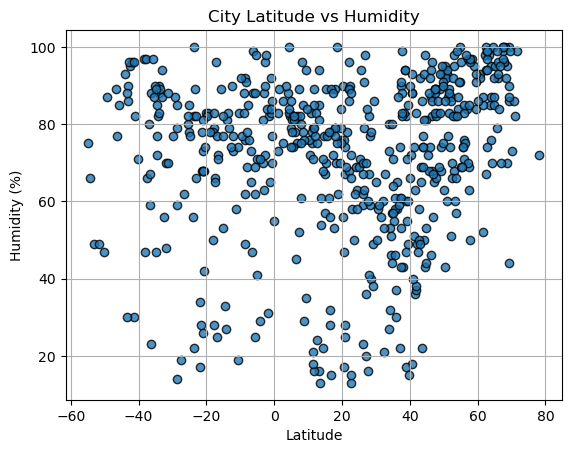

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    
)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

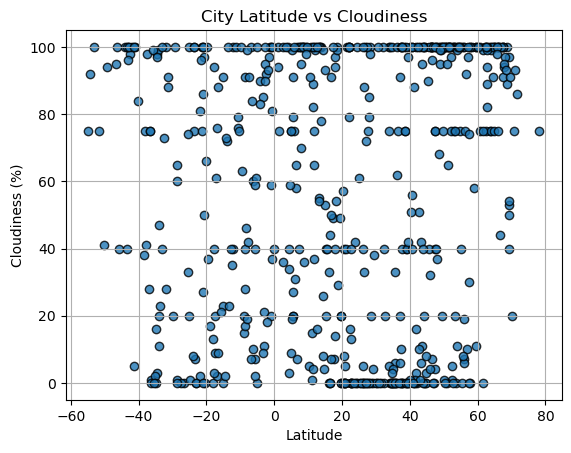

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    
)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

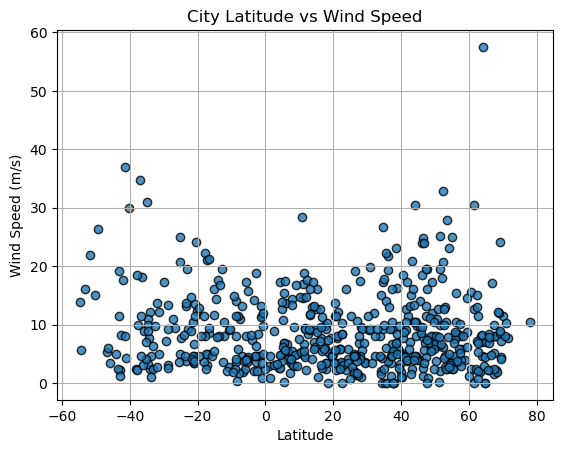

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    
)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_lin_regression(x_values, y_values, ylabel, text_coords):
    # Compute the linear regression
    (slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
    y_hat = x_values*slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, y_hat, "r-")
    plt.annotate(line_eq, text_coords,fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vadso,70.0744,29.7487,19.56,73,20,11.50,NO,1700332062
5,qaqortoq,60.7167,-46.0333,31.03,93,100,15.52,GL,1700332065
7,labrador city,52.9463,-66.9114,24.71,68,75,4.61,CA,1700332066
8,kodiak,57.7900,-152.4072,27.91,50,0,5.75,US,1700332067
11,stanley,54.8680,-1.6985,53.19,91,75,3.44,GB,1700332069


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,73.42,85,100,25.01,PN,1700332061
1,port elizabeth,-33.9180,25.5701,65.32,88,20,2.30,ZA,1700332062
3,sao felix do xingu,-6.6447,-51.9950,92.48,47,84,1.79,BR,1700332063
4,waitangi,-43.9535,-176.5597,49.82,93,100,5.01,NZ,1700332064
6,chonchi,-42.6128,-73.8092,52.81,95,98,8.21,CL,1700332065


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7680316530313024


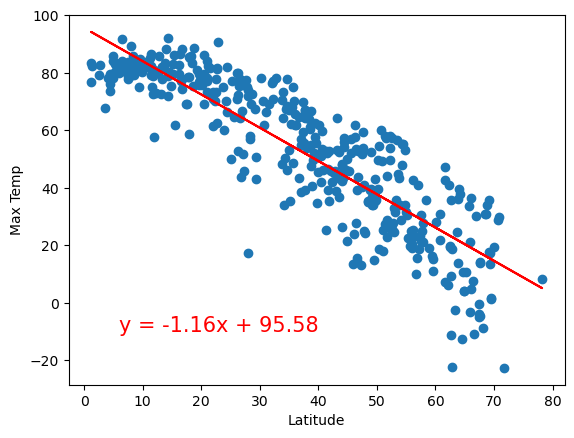

In [17]:
# Linear regression on Northern Hemisphere
plot_lin_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", (6,-10)) 

The r-value is: 0.6072303461432789


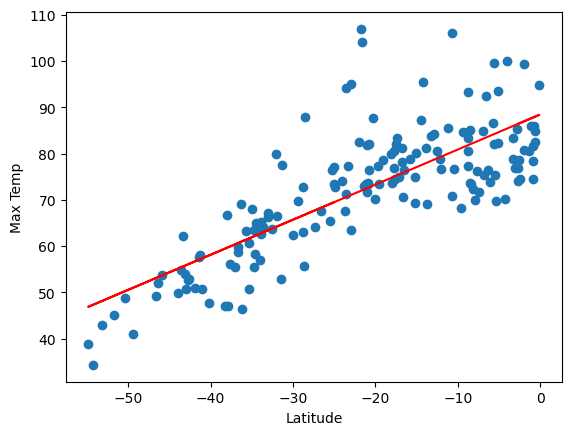

In [18]:
# Linear regression on Southern Hemisphere
plot_lin_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", (6,-10)) 

**Discussion about the linear relationship:** There is a strong postive correlation between latitude and maax temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0775004233850408


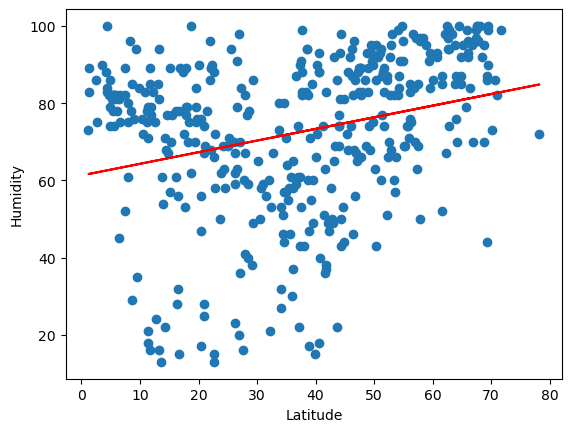

In [19]:
# Northern Hemisphere
plot_lin_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (6,-10)) 

The r-value is: 0.0008986052346479952


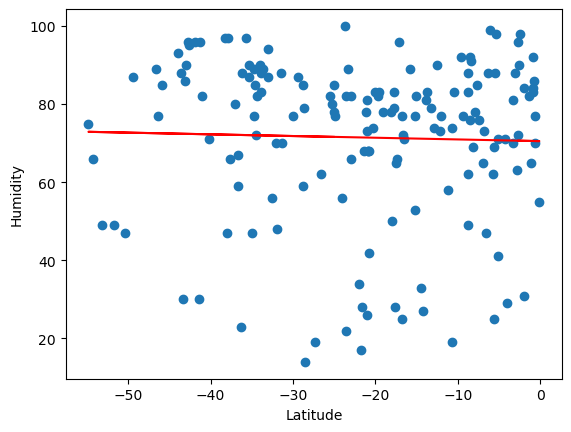

In [20]:
# Southern Hemisphere
plot_lin_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (6,-10)) 

**Discussion about the linear relationship:** There is a weak negtive corretation beteween latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.034251419727338125


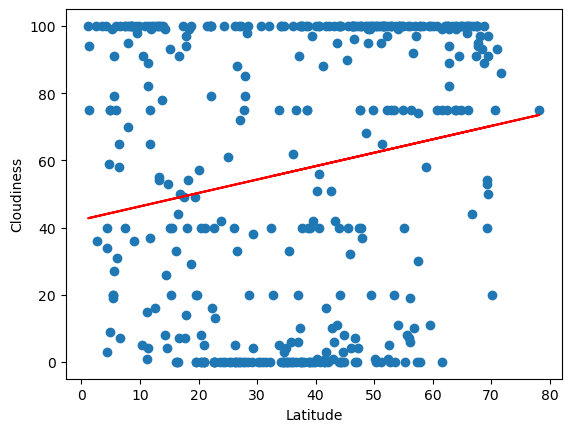

In [21]:
# Northern Hemisphere
plot_lin_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (6,-10)) 

The r-value is: 0.008668240176701059


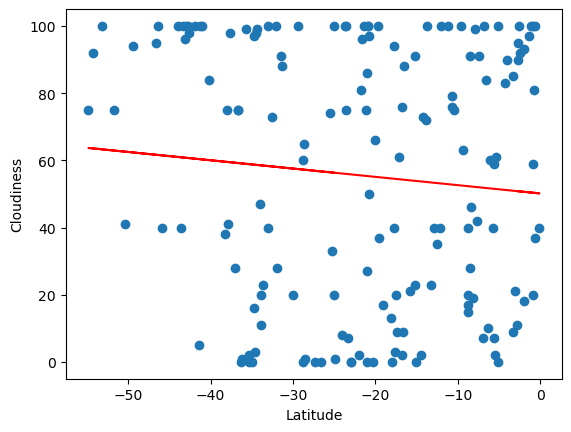

In [22]:
# Southern Hemisphere
plot_lin_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (6,-10)) 

**Discussion about the linear relationship:** There is a weak negative correlation between latitude and cloduness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004264252019992378


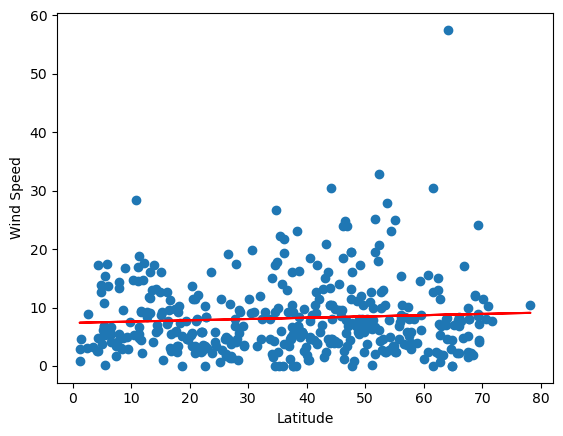

In [23]:
# Northern Hemisphere
plot_lin_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (6,-10)) 

The r-value is: 0.042456026773004946


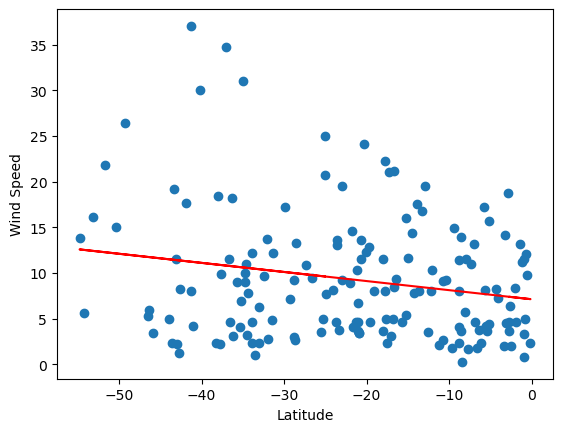

In [24]:
# Southern Hemisphere
plot_lin_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (6,-10)) 

**Discussion about the linear relationship:** There is a weak to modarte corrrelation between wind speeds and latitude. 

In [ ]:
The 